In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [9]:
transform = transforms.ToTensor()

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [15]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  #[1x28x28] -> [16x26x26] -> [16x13x13]
        x = self.pool(F.relu(self.conv2(x)))  #[32x11x11] -> [32x5x5]
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [16]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{10}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/10], Loss: 0.2228
Epoch [2/10], Loss: 0.0608
Epoch [3/10], Loss: 0.0447
Epoch [4/10], Loss: 0.0356
Epoch [5/10], Loss: 0.0273
Epoch [6/10], Loss: 0.0216
Epoch [7/10], Loss: 0.0180
Epoch [8/10], Loss: 0.0156
Epoch [9/10], Loss: 0.0131
Epoch [10/10], Loss: 0.0101


In [17]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 99.07%


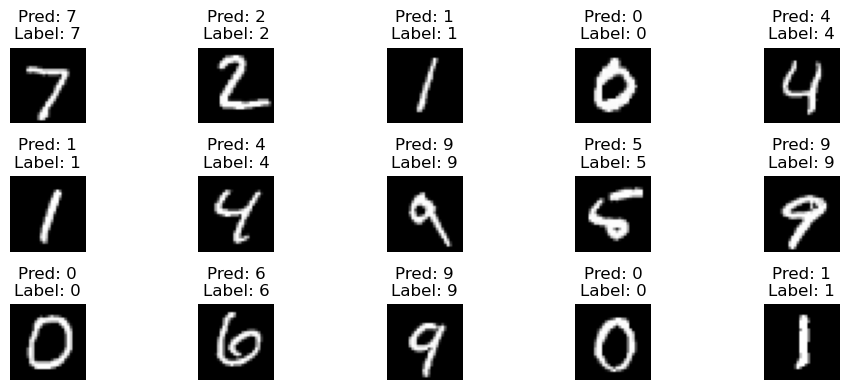

In [18]:
images, labels = next(iter(test_loader))
outputs = model(images)
_, preds = torch.max(outputs, 1)

plt.figure(figsize=(10, 4))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'Pred: {preds[i]}\nLabel: {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()